In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
interpolation_number = "10000"

In [3]:
the_number_of_segment = 100

In [4]:
vessel_name = 'OOCL_LUXEMBOURG'

# 전항지 출항 확인

전항지 출항 지점 확인

In [5]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [6]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [7]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_LUXEMBOURG_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_LUXEMBOURG_voyages_list = [
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed', 'AKA_BHUM_9V7282_2022_8processed'
# ]
# OOCL_LUXEMBOURG_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_1processed',
#     'OOCL_LUXEMBOURG_VRGO3_2022_6processed',
#     'OOCL_NEW_YORK_VRJS2_2022_3processed'
# ]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [8]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## OOCL_LUXEMBOURG

In [9]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from shapely.geometry import LineString

In [12]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

### interpolation 1000

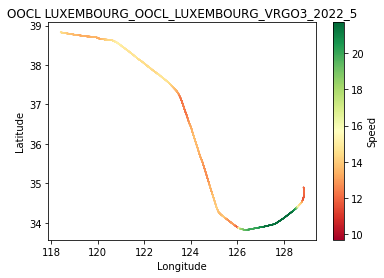

보간법 전 일반 평균 속도 : 14.587777777777776
보간법 전 일반 속도 표준편차: 2.633341347841563
보간법 전 저속 제거 평균 속도 : 14.587777777777776
보간법 전 저속 제거 속도 표준편차: 2.633341347841563
-
보간법 후 일반 평균 속도 : 14.592068155948184
보간법 후 일반 속도 표준편차: 2.5378117114036414
보간법 후 저속 제거 평균 속도 : 14.592068155948184
보간법 후 저속 제거 속도 표준편차: 2.5378117114036414


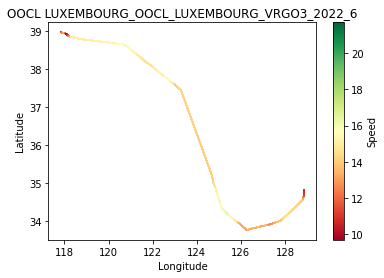

보간법 전 일반 평균 속도 : 14.675263157894738
보간법 전 일반 속도 표준편차: 1.2063677505481323
보간법 전 저속 제거 평균 속도 : 14.675263157894738
보간법 전 저속 제거 속도 표준편차: 1.2063677505481323
-
보간법 후 일반 평균 속도 : 14.392892911536764
보간법 후 일반 속도 표준편차: 1.0593490724553334
보간법 후 저속 제거 평균 속도 : 14.392892911536764
보간법 후 저속 제거 속도 표준편차: 1.0593490724553334


In [13]:
max_speed_list = []
min_speed_list = []
for i in OOCL_LUXEMBOURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_LUXEMBOURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [14]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

[]

In [15]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_LUXEMBOURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [16]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [17]:
# all_data = pd.concat(high_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [18]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

In [19]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [20]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [21]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [22]:
def cal_duration(speed, distance):
    if speed ==0:
        speed = 0.1
    hour = int(distance // speed)
    minute = int(
        (distance / speed - hour) * 60)
    second = ((distance / speed - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# ETA 실험 (interpolation 10000), OOCL_LUXEMBRUG 6항차

In [23]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.666867e+09,118.115400,38.896750,12.500000
1,1.666867e+09,118.116445,38.896593,12.518604
2,1.666867e+09,118.117491,38.896437,12.537209
3,1.666867e+09,118.118536,38.896280,12.555813
4,1.666868e+09,118.119581,38.896124,12.574417
...,...,...,...,...
9995,1.667038e+09,128.857257,34.857649,11.351867
9996,1.667038e+09,128.857118,34.858512,11.351400
9997,1.667038e+09,128.856979,34.859374,11.350933
9998,1.667038e+09,128.856839,34.860237,11.350467


In [24]:
# high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
# high_speed_interpolated_df

In [25]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [26]:
seg_length = int(len(high_speed_interpolated_df) / the_number_of_segment)

In [27]:
high_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [28]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

13.255991713032262
13.3715533047103
12.231602553597261
13.321579248886746
14.331901153990025
14.288338532844342
14.219118719820933
14.199410713869941
14.190534502400503
14.246687804937341
14.316358026861629
14.351100943228857
14.315287369692733
14.482176197808533
14.707634670257427
14.840797743317863
14.987356107680732
15.291164626848465
15.44896039316137
15.475903692181156
15.373921740401045
15.185500465145543
15.014266714756516
14.927288104972634
14.858717346202097
14.6686226858058
14.563166996830137
14.584863050890043
14.631177913876543
14.799349150510668
14.90379872023804
14.835614039775294
14.907074098695004
15.091048766173994
15.055056141331498
14.818203695660712
14.34313370556165
14.174141278948735
13.972879412161118
13.76926269823934
13.512823181543459
13.254847609701674
13.224941477058103
13.312060271532287
13.339476204844413
13.215406800070978
13.293321958325041
13.430640431307257
13.602460276722514
13.706914143705712
13.764653599985236
13.87413934301495
13.916406578303526
13

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [29]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터

    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df, the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [30]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 14:40:16.929747
평균: 0 days 22:30:11.572445601


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [31]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [32]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [33]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 14:40:16.929747
평균: 0 days 22:30:11.572445601


In [34]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 17:33:48.365239,2022-11-25 21:46:07.464304,0 days 04:12:19.099065
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 17:08:55.431450,2022-11-25 21:46:07.464304,0 days 04:37:12.032854
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 17:03:52.770389,2022-11-25 21:46:07.464304,0 days 04:42:14.693915
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 16:58:49.484724,2022-11-25 21:46:07.464304,0 days 04:47:17.979580
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-25 16:53:46.882799,2022-11-25 21:46:07.464304,0 days 04:52:20.581505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8677,34.7381,10.9,0.0,2022-11-25 21:20:52.028833,2022-11-25 12:16:11.000000,2022-11-25 12:17:47,under way using engine,26.115455,63.319996,NaT,2022-11-25 21:46:07.464304,NaT
217,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8689,34.7607,10.8,0.0,2022-11-25 21:25:55.426726,2022-11-25 12:23:35.000000,2022-11-25 12:23:48,under way using engine,23.662729,57.371838,NaT,2022-11-25 21:46:07.464304,NaT
218,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8698,34.7742,10.9,359.0,2022-11-25 21:30:57.481481,2022-11-25 12:27:50.000000,2022-11-25 12:23:48,under way using engine,22.207740,53.845281,NaT,2022-11-25 21:46:07.464304,NaT
219,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8706,34.7960,10.7,349.0,2022-11-25 21:36:01.618994,2022-11-25 12:35:00.000000,2022-11-25 12:23:48,under way using engine,19.859317,48.157436,NaT,2022-11-25 21:46:07.464304,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [35]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [36]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [37]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:08.086316
평균: 0 days 01:01:34.246021975


In [38]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:46:54.970245,2022-11-25 21:46:07.464304,0 days 00:00:47.505941
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:44:08.650170,2022-11-25 21:46:07.464304,0 days 00:01:58.814134
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:48:06.829252,2022-11-25 21:46:07.464304,0 days 00:01:59.364948
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:49:46.091543,2022-11-25 21:46:07.464304,0 days 00:03:38.627239
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:41:15.769360,2022-11-25 21:46:07.464304,0 days 00:04:51.694944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:52:35.854263,2022-11-25 21:46:07.464304,0 days 01:53:31.610041
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:03.246116,2022-11-25 21:46:07.464304,0 days 01:54:04.218188
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:48.716375,2022-11-25 21:46:07.464304,0 days 01:56:18.747929
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:00.677870,2022-11-25 21:46:07.464304,0 days 01:58:06.786434


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [39]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [40]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [41]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 14:39:29.481306
평균: 0 days 01:46:28.690399019


In [42]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
45,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.3904,38.3315,14.9,121.0,2022-11-24 09:16:29.630119,2022-11-24 00:11:50.000000,2022-11-23 11:53:48,under way using engine,760.546742,2056.016462,2022-11-25 21:46:32.770068,2022-11-25 21:46:07.464304,0 days 00:00:25.305764
39,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.0644,38.4729,15.3,118.0,2022-11-24 08:05:45.793928,2022-11-23 23:03:23,2022-11-23 10:53:45,under way using engine,792.998232,2185.289227,2022-11-25 21:45:30.532198,2022-11-25 21:46:07.464304,0 days 00:00:36.932106
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:47:15.739806,2022-11-25 21:46:07.464304,0 days 00:01:08.275502
60,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.1076,37.9977,15.0,121.0,2022-11-24 11:52:53.718366,2022-11-24 02:50:24,2022-11-24 01:53:50,under way using engine,687.811243,1868.148631,2022-11-25 21:47:40.199811,2022-11-25 21:46:07.464304,0 days 00:01:32.735507
53,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.7727,38.1495,14.7,113.0,2022-11-24 10:37:10.898531,2022-11-24 01:36:58.000000,2022-11-23 11:53:48,under way using engine,721.601268,1932.879670,2022-11-25 21:42:30.144462,2022-11-25 21:46:07.464304,0 days 00:03:37.319842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 13:31:49.075896,2022-11-25 21:46:07.464304,0 days 08:14:18.388408
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 13:27:36.801253,2022-11-25 21:46:07.464304,0 days 08:18:30.663051
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 11:59:35.273438,2022-11-25 21:46:07.464304,0 days 09:46:32.190866
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 10:46:21.320023,2022-11-25 21:46:07.464304,0 days 10:59:46.144281


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [43]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [44]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [45]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 19:29:47.158029
평균: 0 days 17:36:06.817042794


In [46]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-25 21:48:01.658610,2022-11-25 21:46:07.464304,0 days 00:01:54.194306
203,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8473,34.0291,14.0,58.0,2022-11-25 16:23:29.696730,2022-11-25 07:23:12.000000,2022-11-25 02:29:49,under way using engine,137.378392,357.174840,2022-11-25 21:48:33.397030,2022-11-25 21:46:07.464304,0 days 00:02:25.932726
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 21:39:54.979551,2022-11-25 21:46:07.464304,0 days 00:06:12.484753
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:54:25.592161,2022-11-25 21:46:07.464304,0 days 00:08:18.127857
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:30:41.535275,2022-11-25 21:46:07.464304,0 days 00:15:25.929029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-28 02:05:34.410254,2022-11-25 21:46:07.464304,2 days 04:19:26.945950
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-28 05:34:28.353009,2022-11-25 21:46:07.464304,2 days 07:48:20.888705
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-28 11:56:28.516607,2022-11-25 21:46:07.464304,2 days 14:10:21.052303
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-28 22:58:47.317012,2022-11-25 21:46:07.464304,3 days 01:12:39.852708


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [47]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [48]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [49]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 18:31:18.609105
평균: 0 days 17:49:44.211911573


In [50]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [51]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [52]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [53]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 28 days 01:27:08.576430
평균: 13 days 08:41:33.876117326


In [54]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-27 21:46:33.248029,2022-11-25 21:46:07.464304,2 days 00:00:25.783725
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [55]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [56]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [57]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:33:46.556629
평균: 0 days 08:30:31.054836343


In [58]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-25 21:24:30.515371,2022-11-25 21:46:07.464304,0 days 00:21:36.948933
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:06:31.700832,2022-11-25 21:46:07.464304,0 days 01:39:35.763472
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 19:57:13.027288,2022-11-25 21:46:07.464304,0 days 01:48:54.437016
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 19:53:19.527854,2022-11-25 21:46:07.464304,0 days 01:52:47.936450
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 19:52:12.069942,2022-11-25 21:46:07.464304,0 days 01:53:55.394362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 05:33:06.422695,2022-11-25 21:46:07.464304,0 days 16:13:01.041609
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 05:29:36.755435,2022-11-25 21:46:07.464304,0 days 16:16:30.708869
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 05:21:01.580606,2022-11-25 21:46:07.464304,0 days 16:25:05.883698
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 05:17:23.579104,2022-11-25 21:46:07.464304,0 days 16:28:43.885200


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [59]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [60]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [61]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:36:11.947278
평균: 0 days 08:28:49.101219935


In [62]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11250200    213
Name: eta, dtype: int64

In [63]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:13:07.174000,2022-11-25 21:46:07.464304,0 days 01:33:00.290304
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 20:03:30.915464,2022-11-25 21:46:07.464304,0 days 01:42:36.548840
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 19:58:28.254403,2022-11-25 21:46:07.464304,0 days 01:47:39.209901
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 19:53:24.968738,2022-11-25 21:46:07.464304,0 days 01:52:42.495566
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 19:48:27.603923,2022-11-25 21:46:07.464304,0 days 01:57:39.860381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 05:50:18.496354,2022-11-25 21:46:07.464304,0 days 15:55:48.967950
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 05:40:12.651931,2022-11-25 21:46:07.464304,0 days 16:05:54.812373
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 05:30:07.053752,2022-11-25 21:46:07.464304,0 days 16:16:00.410552
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 05:25:04.538763,2022-11-25 21:46:07.464304,0 days 16:21:02.925541


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [64]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [65]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [66]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 11:20:09.316970
평균: 0 days 03:23:57.189509905


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [67]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [68]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [69]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 11:20:09.316970
평균: 0 days 03:23:57.189509905


In [70]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
97,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7933,34.9458,14.4,152.0,2022-11-25 03:36:18.942580,2022-11-24 18:35:34.000000,2022-11-24 05:53:50,under way using engine,366.898823,969.842022,2022-11-25 21:46:22.893757,2022-11-25 21:46:07.464304,0 days 00:00:15.429453
90,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7250,35.0750,14.4,181.0,2022-11-25 03:00:58.421601,2022-11-24 18:00:28.000000,2022-11-24 05:53:50,under way using engine,373.001988,985.974821,2022-11-25 21:45:19.295381,2022-11-25 21:46:07.464304,0 days 00:00:48.168923
91,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7251,35.0547,14.4,180.0,2022-11-25 03:06:01.176838,2022-11-24 18:05:28,2022-11-24 05:53:50,under way using engine,372.975106,985.903765,2022-11-25 21:48:04.918451,2022-11-25 21:46:07.464304,0 days 00:01:57.454147
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 21:49:13.639482,2022-11-25 21:46:07.464304,0 days 00:03:06.175178
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:42:52.590612,2022-11-25 21:46:07.464304,0 days 00:03:14.873692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8677,34.7381,10.9,0.0,2022-11-25 21:20:52.028833,2022-11-25 12:16:11.000000,2022-11-25 12:17:47,under way using engine,26.115455,63.319996,NaT,2022-11-25 21:46:07.464304,NaT
217,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8689,34.7607,10.8,0.0,2022-11-25 21:25:55.426726,2022-11-25 12:23:35.000000,2022-11-25 12:23:48,under way using engine,23.662729,57.371838,NaT,2022-11-25 21:46:07.464304,NaT
218,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8698,34.7742,10.9,359.0,2022-11-25 21:30:57.481481,2022-11-25 12:27:50.000000,2022-11-25 12:23:48,under way using engine,22.207740,53.845281,NaT,2022-11-25 21:46:07.464304,NaT
219,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8706,34.7960,10.7,349.0,2022-11-25 21:36:01.618994,2022-11-25 12:35:00.000000,2022-11-25 12:23:48,under way using engine,19.859317,48.157436,NaT,2022-11-25 21:46:07.464304,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [71]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [72]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [73]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 00:12:37.144594
평균: 0 days 01:39:23.204535313


In [74]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.8233,33.8411,14.1,83.0,2022-11-25 12:36:23.192615,2022-11-25 03:33:45.000000,2022-11-25 02:29:49,under way using engine,221.990650,579.483768,2022-11-25 21:44:27.751292,2022-11-25 21:46:07.464304,0 days 00:01:39.713012
195,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.6683,33.9755,14.0,82.0,2022-11-25 15:43:07.837945,2022-11-25 06:42:45.000000,2022-11-25 02:29:49,under way using engine,152.818668,397.318548,2022-11-25 21:48:18.175716,2022-11-25 21:46:07.464304,0 days 00:02:10.711412
81,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,123.1915,37.4850,14.4,124.0,2022-11-24 15:50:07.049203,2022-11-24 06:46:33,2022-11-24 05:53:50,under way using engine,576.972097,1525.139218,2022-11-25 21:48:42.414456,2022-11-25 21:46:07.464304,0 days 00:02:34.950152
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:48:53.443555,2022-11-25 21:46:07.464304,0 days 00:02:45.979251
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:48:53.939146,2022-11-25 21:46:07.464304,0 days 00:02:46.474842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-26 06:27:52.347945,2022-11-25 21:46:07.464304,0 days 08:41:44.883641
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:26:52.337449,2022-11-25 21:46:07.464304,0 days 11:40:44.873145
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 14:08:47.406786,2022-11-25 21:46:07.464304,0 days 16:22:39.942482
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [75]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [76]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [77]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:04:03.879661
평균: 0 days 02:52:51.464568199


In [78]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
96,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7820,34.9621,14.5,152.0,2022-11-25 03:31:15.144864,2022-11-24 18:31:04.000000,2022-11-24 05:53:50,under way using engine,367.883219,976.673874,2022-11-25 21:45:50.524582,2022-11-25 21:46:07.464304,0 days 00:00:16.939722
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:45:16.827131,2022-11-25 21:46:07.464304,0 days 00:00:50.637173
95,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7683,34.9816,14.5,152.0,2022-11-25 03:26:12.818771,2022-11-24 18:25:39,2022-11-24 05:53:50,under way using engine,369.088879,979.874716,2022-11-25 21:47:18.180232,2022-11-25 21:46:07.464304,0 days 00:01:10.715928
98,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.8057,34.9278,14.5,152.0,2022-11-25 03:41:20.874561,2022-11-24 18:40:35.000000,2022-11-24 05:53:50,under way using engine,365.829148,971.220629,2022-11-25 21:44:51.085256,2022-11-25 21:46:07.464304,0 days 00:01:16.379048
94,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7560,34.9987,14.5,152.0,2022-11-25 03:21:09.632685,2022-11-24 18:20:54,2022-11-24 05:53:50,under way using engine,370.182395,982.777835,2022-11-25 21:48:00.088235,2022-11-25 21:46:07.464304,0 days 00:01:52.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 12:04:44.840787,2022-11-25 21:46:07.464304,0 days 09:41:22.623517
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:43:18.714772,2022-11-25 21:46:07.464304,0 days 11:57:11.250468
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 19:43:05.813628,2022-11-25 21:46:07.464304,0 days 21:56:58.349324


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [79]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [80]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [81]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 8 days 02:24:20.912982
평균: 0 days 18:45:05.713694742


In [82]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
203,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8473,34.0291,14.0,58.0,2022-11-25 16:23:29.696730,2022-11-25 07:23:12.000000,2022-11-25 02:29:49,under way using engine,137.378392,357.174840,2022-11-25 21:45:48.081359,2022-11-25 21:46:07.464304,0 days 00:00:19.382945
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:33:07.897533,2022-11-25 21:46:07.464304,0 days 00:12:59.566771
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:02:21.681804,2022-11-25 21:46:07.464304,0 days 00:16:14.217500
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:25:57.359084,2022-11-25 21:46:07.464304,0 days 00:20:10.105220
192,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.5990,33.9640,13.6,82.0,2022-11-25 15:28:05.423323,2022-11-25 06:27:49.000000,2022-11-25 02:29:49,under way using engine,158.178871,405.059028,2022-11-25 22:18:25.438021,2022-11-25 21:46:07.464304,0 days 00:32:17.973717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-28 23:46:04.035483,2022-11-25 21:46:07.464304,3 days 01:59:56.571179
50,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.5968,38.2272,14.8,127.0,2022-11-24 10:01:51.360485,2022-11-24 00:58:12,2022-11-23 11:53:48,under way using engine,739.223284,1989.136123,2022-11-29 11:12:57.324861,2022-11-25 21:46:07.464304,3 days 13:26:49.860557
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-29 18:35:14.206236,2022-11-25 21:46:07.464304,3 days 20:49:06.741932
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-12-01 04:57:30.367723,2022-11-25 21:46:07.464304,5 days 07:11:22.903419


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 20:53:48.258892
평균: 0 days 18:07:15.800889247


In [86]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:47:24.661768,2022-11-25 21:46:07.464304,0 days 00:01:17.197464
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:31:30.780568,2022-11-25 21:46:07.464304,0 days 00:14:36.683736
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:25:00.569673,2022-11-25 21:46:07.464304,0 days 00:21:06.894631
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:07:45.398109,2022-11-25 21:46:07.464304,0 days 00:21:37.933805
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:23:06.882313,2022-11-25 21:46:07.464304,0 days 00:23:00.581991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-28 03:15:38.555925,2022-11-25 21:46:07.464304,2 days 05:29:31.091621
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-28 06:30:22.967967,2022-11-25 21:46:07.464304,2 days 08:44:15.503663
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-28 14:14:45.714796,2022-11-25 21:46:07.464304,2 days 16:28:38.250492
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-29 01:18:20.662096,2022-11-25 21:46:07.464304,3 days 03:32:13.197792


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [87]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [88]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [89]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 20:53:48.258892
평균: 0 days 18:07:15.800889247


In [90]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:47:24.661768,2022-11-25 21:46:07.464304,0 days 00:01:17.197464
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:31:30.780568,2022-11-25 21:46:07.464304,0 days 00:14:36.683736
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:25:00.569673,2022-11-25 21:46:07.464304,0 days 00:21:06.894631
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:07:45.398109,2022-11-25 21:46:07.464304,0 days 00:21:37.933805
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:23:06.882313,2022-11-25 21:46:07.464304,0 days 00:23:00.581991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-28 03:15:38.555925,2022-11-25 21:46:07.464304,2 days 05:29:31.091621
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-28 06:30:22.967967,2022-11-25 21:46:07.464304,2 days 08:44:15.503663
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-28 14:14:45.714796,2022-11-25 21:46:07.464304,2 days 16:28:38.250492
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-29 01:18:20.662096,2022-11-25 21:46:07.464304,3 days 03:32:13.197792


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [91]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [92]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [93]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:04:03.879661
평균: 0 days 02:52:51.464568199


In [94]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
96,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7820,34.9621,14.5,152.0,2022-11-25 03:31:15.144864,2022-11-24 18:31:04.000000,2022-11-24 05:53:50,under way using engine,367.883219,976.673874,2022-11-25 21:45:50.524582,2022-11-25 21:46:07.464304,0 days 00:00:16.939722
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:45:16.827131,2022-11-25 21:46:07.464304,0 days 00:00:50.637173
95,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7683,34.9816,14.5,152.0,2022-11-25 03:26:12.818771,2022-11-24 18:25:39,2022-11-24 05:53:50,under way using engine,369.088879,979.874716,2022-11-25 21:47:18.180232,2022-11-25 21:46:07.464304,0 days 00:01:10.715928
98,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.8057,34.9278,14.5,152.0,2022-11-25 03:41:20.874561,2022-11-24 18:40:35.000000,2022-11-24 05:53:50,under way using engine,365.829148,971.220629,2022-11-25 21:44:51.085256,2022-11-25 21:46:07.464304,0 days 00:01:16.379048
94,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7560,34.9987,14.5,152.0,2022-11-25 03:21:09.632685,2022-11-24 18:20:54,2022-11-24 05:53:50,under way using engine,370.182395,982.777835,2022-11-25 21:48:00.088235,2022-11-25 21:46:07.464304,0 days 00:01:52.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 12:04:44.840787,2022-11-25 21:46:07.464304,0 days 09:41:22.623517
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:43:18.714772,2022-11-25 21:46:07.464304,0 days 11:57:11.250468
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 19:43:05.813628,2022-11-25 21:46:07.464304,0 days 21:56:58.349324


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [95]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [96]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [97]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 00:12:37.144594
평균: 0 days 01:39:23.204535313


In [98]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11250200    213
Name: eta, dtype: int64

In [99]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.8233,33.8411,14.1,83.0,2022-11-25 12:36:23.192615,2022-11-25 03:33:45.000000,2022-11-25 02:29:49,under way using engine,221.990650,579.483768,2022-11-25 21:44:27.751292,2022-11-25 21:46:07.464304,0 days 00:01:39.713012
195,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.6683,33.9755,14.0,82.0,2022-11-25 15:43:07.837945,2022-11-25 06:42:45.000000,2022-11-25 02:29:49,under way using engine,152.818668,397.318548,2022-11-25 21:48:18.175716,2022-11-25 21:46:07.464304,0 days 00:02:10.711412
81,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,123.1915,37.4850,14.4,124.0,2022-11-24 15:50:07.049203,2022-11-24 06:46:33,2022-11-24 05:53:50,under way using engine,576.972097,1525.139218,2022-11-25 21:48:42.414456,2022-11-25 21:46:07.464304,0 days 00:02:34.950152
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:48:53.443555,2022-11-25 21:46:07.464304,0 days 00:02:45.979251
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:48:53.939146,2022-11-25 21:46:07.464304,0 days 00:02:46.474842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-26 06:27:52.347945,2022-11-25 21:46:07.464304,0 days 08:41:44.883641
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:26:52.337449,2022-11-25 21:46:07.464304,0 days 11:40:44.873145
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 14:08:47.406786,2022-11-25 21:46:07.464304,0 days 16:22:39.942482
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [100]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [101]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [102]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 22:46:01.474351
평균: 0 days 01:50:37.968774333


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [103]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [104]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [105]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 22:46:01.474351
평균: 0 days 01:50:37.968774333


In [106]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
159,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0604,33.8645,13.3,123.0,2022-11-25 09:39:45.966633,2022-11-25 00:39:01,2022-11-24 11:41:47,under way using engine,281.326042,712.960845,2022-11-25 21:46:11.372884,2022-11-25 21:46:07.464304,0 days 00:00:03.908580
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 21:46:11.584960,2022-11-25 21:46:07.464304,0 days 00:00:04.120656
169,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.7145,33.8258,13.2,83.0,2022-11-25 12:11:07.784613,2022-11-25 03:10:11.000000,2022-11-25 02:29:49,under way using engine,231.238927,584.116254,2022-11-25 21:45:37.608860,2022-11-25 21:46:07.464304,0 days 00:00:29.855444
166,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.4256,33.7854,13.4,77.0,2022-11-25 11:10:34.866932,2022-11-25 02:06:49.000000,2022-11-25 02:05:47,under way using engine,256.118725,651.266599,2022-11-25 21:46:52.753082,2022-11-25 21:46:07.464304,0 days 00:00:45.288778
84,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.6604,35.2401,14.1,161.0,2022-11-25 02:20:35.517998,2022-11-24 17:17:22,2022-11-24 05:53:50,under way using engine,379.509296,990.669997,2022-11-25 21:45:17.774131,2022-11-25 21:46:07.464304,0 days 00:00:49.690173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8677,34.7381,10.9,0.0,2022-11-25 21:20:52.028833,2022-11-25 12:16:11.000000,2022-11-25 12:17:47,under way using engine,26.115455,63.319996,NaT,2022-11-25 21:46:07.464304,NaT
217,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8689,34.7607,10.8,0.0,2022-11-25 21:25:55.426726,2022-11-25 12:23:35.000000,2022-11-25 12:23:48,under way using engine,23.662729,57.371838,NaT,2022-11-25 21:46:07.464304,NaT
218,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8698,34.7742,10.9,359.0,2022-11-25 21:30:57.481481,2022-11-25 12:27:50.000000,2022-11-25 12:23:48,under way using engine,22.207740,53.845281,NaT,2022-11-25 21:46:07.464304,NaT
219,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8706,34.7960,10.7,349.0,2022-11-25 21:36:01.618994,2022-11-25 12:35:00.000000,2022-11-25 12:23:48,under way using engine,19.859317,48.157436,NaT,2022-11-25 21:46:07.464304,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [107]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [108]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [109]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 01:59:08.086316
평균: 0 days 01:01:34.246021975


In [110]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 21:46:54.970245,2022-11-25 21:46:07.464304,0 days 00:00:47.505941
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 21:44:08.650170,2022-11-25 21:46:07.464304,0 days 00:01:58.814134
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-11-25 21:48:06.829252,2022-11-25 21:46:07.464304,0 days 00:01:59.364948
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 21:49:46.091543,2022-11-25 21:46:07.464304,0 days 00:03:38.627239
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-11-25 21:41:15.769360,2022-11-25 21:46:07.464304,0 days 00:04:51.694944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8065,33.9790,14.9,118.0,2022-11-25 08:39:08.648503,2022-11-24 23:36:44,2022-11-24 11:17:45,under way using engine,297.325847,803.772868,2022-11-25 19:52:35.854263,2022-11-25 21:46:07.464304,0 days 01:53:31.610041
163,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.2528,33.7648,13.2,122.0,2022-11-25 10:30:12.115288,2022-11-25 01:28:28.000000,2022-11-24 11:41:47,under way using engine,270.992321,684.534482,2022-11-25 19:52:03.246116,2022-11-25 21:46:07.464304,0 days 01:54:04.218188
155,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.9251,33.9410,13.7,109.0,2022-11-25 09:04:23.661234,2022-11-25 00:03:03.000000,2022-11-24 11:41:47,under way using engine,288.958830,742.667547,2022-11-25 19:49:48.716375,2022-11-25 21:46:07.464304,0 days 01:56:18.747929
157,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.0211,33.8863,13.2,125.0,2022-11-25 09:29:37.039011,2022-11-25 00:28:39.000000,2022-11-24 11:41:47,under way using engine,283.504613,716.140896,2022-11-25 19:48:00.677870,2022-11-25 21:46:07.464304,0 days 01:58:06.786434


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [111]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [112]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [113]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 14:39:29.481306
평균: 0 days 01:46:28.690399019


In [114]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
45,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.3904,38.3315,14.9,121.0,2022-11-24 09:16:29.630119,2022-11-24 00:11:50.000000,2022-11-23 11:53:48,under way using engine,760.546742,2056.016462,2022-11-25 21:46:32.770068,2022-11-25 21:46:07.464304,0 days 00:00:25.305764
39,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.0644,38.4729,15.3,118.0,2022-11-24 08:05:45.793928,2022-11-23 23:03:23,2022-11-23 10:53:45,under way using engine,792.998232,2185.289227,2022-11-25 21:45:30.532198,2022-11-25 21:46:07.464304,0 days 00:00:36.932106
44,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.2837,38.3809,15.2,122.0,2022-11-24 08:51:11.735893,2022-11-23 23:48:41.000000,2022-11-23 11:29:48,under way using engine,771.332058,2115.204322,2022-11-25 21:47:15.739806,2022-11-25 21:46:07.464304,0 days 00:01:08.275502
60,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,122.1076,37.9977,15.0,121.0,2022-11-24 11:52:53.718366,2022-11-24 02:50:24,2022-11-24 01:53:50,under way using engine,687.811243,1868.148631,2022-11-25 21:47:40.199811,2022-11-25 21:46:07.464304,0 days 00:01:32.735507
53,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,121.7727,38.1495,14.7,113.0,2022-11-24 10:37:10.898531,2022-11-24 01:36:58.000000,2022-11-23 11:53:48,under way using engine,721.601268,1932.879670,2022-11-25 21:42:30.144462,2022-11-25 21:46:07.464304,0 days 00:03:37.319842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-25 13:31:49.075896,2022-11-25 21:46:07.464304,0 days 08:14:18.388408
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 13:27:36.801253,2022-11-25 21:46:07.464304,0 days 08:18:30.663051
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 11:59:35.273438,2022-11-25 21:46:07.464304,0 days 09:46:32.190866
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 10:46:21.320023,2022-11-25 21:46:07.464304,0 days 10:59:46.144281


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [115]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [116]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [117]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 355 days 22:36:21.229712
평균: 2 days 16:44:23.401843135


In [118]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-25 21:48:01.658610,2022-11-25 21:46:07.464304,0 days 00:01:54.194306
203,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8473,34.0291,14.0,58.0,2022-11-25 16:23:29.696730,2022-11-25 07:23:12.000000,2022-11-25 02:29:49,under way using engine,137.378392,357.174840,2022-11-25 21:48:33.397030,2022-11-25 21:46:07.464304,0 days 00:02:25.932726
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 21:39:54.979551,2022-11-25 21:46:07.464304,0 days 00:06:12.484753
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:54:25.592161,2022-11-25 21:46:07.464304,0 days 00:08:18.127857
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:30:41.535275,2022-11-25 21:46:07.464304,0 days 00:15:25.929029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-29 17:15:54.622333,2022-11-25 21:46:07.464304,3 days 19:29:47.158029
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-12-02 21:53:22.186599,2022-11-25 21:46:07.464304,7 days 00:07:14.722295
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-12-03 07:10:47.558933,2022-11-25 21:46:07.464304,7 days 09:24:40.094629
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-12-10 14:03:40.697693,2022-11-25 21:46:07.464304,14 days 16:17:33.233389


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [119]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [120]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [121]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 18:31:18.609105
평균: 0 days 18:10:01.766817460


In [122]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:44:21.960617,2022-11-25 21:46:07.464304,0 days 00:01:45.503687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-27 16:17:26.073409,2022-11-25 21:46:07.464304,1 days 18:31:18.609105


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [123]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [124]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [125]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 28 days 01:27:08.576430
평균: 13 days 13:33:16.945924905


In [126]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-27 21:46:33.248029,2022-11-25 21:46:07.464304,2 days 00:00:25.783725
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
208,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9719,34.0945,14.5,57.0,2022-11-25 16:53:46.882799,2022-11-25 07:53:17.000000,2022-11-25 02:29:49,under way using engine,124.483113,330.483691,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-28 06:12:43.244447,2022-11-25 21:46:07.464304,2 days 08:26:35.780143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-12-23 23:13:16.040734,2022-11-25 21:46:07.464304,28 days 01:27:08.576430


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [127]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [128]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [129]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:33:46.556629
평균: 0 days 08:30:31.054836343


In [130]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
6,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0845,38.9198,9.7,116.0,2022-11-23 22:40:27.116438,2022-11-23 13:39:18.000000,2022-11-23 01:17:47,under way using engine,1049.342563,2574.377137,2022-11-25 21:24:30.515371,2022-11-25 21:46:07.464304,0 days 00:21:36.948933
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:06:31.700832,2022-11-25 21:46:07.464304,0 days 01:39:35.763472
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 19:57:13.027288,2022-11-25 21:46:07.464304,0 days 01:48:54.437016
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 19:53:19.527854,2022-11-25 21:46:07.464304,0 days 01:52:47.936450
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 19:52:12.069942,2022-11-25 21:46:07.464304,0 days 01:53:55.394362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.5649,38.8056,15.1,99.0,2022-11-24 00:26:26.767676,2022-11-23 15:22:46.000000,2022-11-23 03:17:49,under way using engine,1005.998989,2745.427935,2022-11-25 05:33:06.422695,2022-11-25 21:46:07.464304,0 days 16:13:01.041609
15,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4794,38.8173,15.0,106.0,2022-11-24 00:11:18.436074,2022-11-23 15:06:41.000000,2022-11-23 02:53:45,under way using engine,1013.359171,2752.362027,2022-11-25 05:29:36.755435,2022-11-25 21:46:07.464304,0 days 16:16:30.708869
13,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.4014,38.8392,15.1,111.0,2022-11-23 23:56:10.086188,2022-11-23 14:51:29.000000,2022-11-23 02:53:45,under way using engine,1020.537232,2785.103620,2022-11-25 05:21:01.580606,2022-11-25 21:46:07.464304,0 days 16:25:05.883698
12,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3432,38.8380,15.2,93.0,2022-11-23 23:46:04.074373,2022-11-23 14:40:56.000000,2022-11-23 02:29:49,under way using engine,1025.173480,2811.307210,2022-11-25 05:17:23.579104,2022-11-25 21:46:07.464304,0 days 16:28:43.885200


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [131]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [132]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [133]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:36:11.947278
평균: 0 days 08:28:49.101219935


In [134]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11250200    213
Name: eta, dtype: int64

In [135]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 20:13:07.174000,2022-11-25 21:46:07.464304,0 days 01:33:00.290304
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 20:03:30.915464,2022-11-25 21:46:07.464304,0 days 01:42:36.548840
210,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0129,34.1162,14.6,60.0,2022-11-25 17:03:52.770389,2022-11-25 08:02:59.000000,2022-11-25 02:29:49,under way using engine,120.257329,320.677912,2022-11-25 19:58:28.254403,2022-11-25 21:46:07.464304,0 days 01:47:39.209901
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 19:53:24.968738,2022-11-25 21:46:07.464304,0 days 01:52:42.495566
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 19:48:27.603923,2022-11-25 21:46:07.464304,0 days 01:57:39.860381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0162,38.9361,13.2,101.0,2022-11-23 22:20:15.774291,2022-11-23 13:19:00,2022-11-23 01:17:47,under way using engine,1055.504813,2666.235846,2022-11-25 05:50:18.496354,2022-11-25 21:46:07.464304,0 days 15:55:48.967950
3,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9484,38.9465,13.3,99.0,2022-11-23 22:10:09.929868,2022-11-23 13:05:21.000000,2022-11-23 12:53:51,under way using engine,1061.388073,2689.861674,2022-11-25 05:40:12.651931,2022-11-25 21:46:07.464304,0 days 16:05:54.812373
2,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.9174,38.9510,12.4,101.0,2022-11-23 22:00:04.331689,2022-11-23 12:58:44.000000,2022-11-23 12:53:51,under way using engine,1064.068132,2629.010304,2022-11-25 05:30:07.053752,2022-11-25 21:46:07.464304,0 days 16:16:00.410552
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-25 05:25:04.538763,2022-11-25 21:46:07.464304,0 days 16:21:02.925541


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [136]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [137]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 11:20:09.316970
평균: 0 days 03:23:57.189509905


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [138]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [139]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [140]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 11:20:09.316970
평균: 0 days 03:23:57.189509905


In [141]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
97,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7933,34.9458,14.4,152.0,2022-11-25 03:36:18.942580,2022-11-24 18:35:34.000000,2022-11-24 05:53:50,under way using engine,366.898823,969.842022,2022-11-25 21:46:22.893757,2022-11-25 21:46:07.464304,0 days 00:00:15.429453
90,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7250,35.0750,14.4,181.0,2022-11-25 03:00:58.421601,2022-11-24 18:00:28.000000,2022-11-24 05:53:50,under way using engine,373.001988,985.974821,2022-11-25 21:45:19.295381,2022-11-25 21:46:07.464304,0 days 00:00:48.168923
91,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7251,35.0547,14.4,180.0,2022-11-25 03:06:01.176838,2022-11-24 18:05:28,2022-11-24 05:53:50,under way using engine,372.975106,985.903765,2022-11-25 21:48:04.918451,2022-11-25 21:46:07.464304,0 days 00:01:57.454147
154,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.8985,33.9475,14.1,108.0,2022-11-25 08:59:20.364647,2022-11-24 23:57:10,2022-11-24 11:41:47,under way using engine,290.907216,759.383376,2022-11-25 21:49:13.639482,2022-11-25 21:46:07.464304,0 days 00:03:06.175178
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:42:52.590612,2022-11-25 21:46:07.464304,0 days 00:03:14.873692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8677,34.7381,10.9,0.0,2022-11-25 21:20:52.028833,2022-11-25 12:16:11.000000,2022-11-25 12:17:47,under way using engine,26.115455,63.319996,NaT,2022-11-25 21:46:07.464304,NaT
217,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8689,34.7607,10.8,0.0,2022-11-25 21:25:55.426726,2022-11-25 12:23:35.000000,2022-11-25 12:23:48,under way using engine,23.662729,57.371838,NaT,2022-11-25 21:46:07.464304,NaT
218,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8698,34.7742,10.9,359.0,2022-11-25 21:30:57.481481,2022-11-25 12:27:50.000000,2022-11-25 12:23:48,under way using engine,22.207740,53.845281,NaT,2022-11-25 21:46:07.464304,NaT
219,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.8706,34.7960,10.7,349.0,2022-11-25 21:36:01.618994,2022-11-25 12:35:00.000000,2022-11-25 12:23:48,under way using engine,19.859317,48.157436,NaT,2022-11-25 21:46:07.464304,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [142]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [143]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx =idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [144]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 00:12:37.144594
평균: 0 days 01:39:23.204535313


In [145]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.8233,33.8411,14.1,83.0,2022-11-25 12:36:23.192615,2022-11-25 03:33:45.000000,2022-11-25 02:29:49,under way using engine,221.990650,579.483768,2022-11-25 21:44:27.751292,2022-11-25 21:46:07.464304,0 days 00:01:39.713012
195,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.6683,33.9755,14.0,82.0,2022-11-25 15:43:07.837945,2022-11-25 06:42:45.000000,2022-11-25 02:29:49,under way using engine,152.818668,397.318548,2022-11-25 21:48:18.175716,2022-11-25 21:46:07.464304,0 days 00:02:10.711412
81,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,123.1915,37.4850,14.4,124.0,2022-11-24 15:50:07.049203,2022-11-24 06:46:33,2022-11-24 05:53:50,under way using engine,576.972097,1525.139218,2022-11-25 21:48:42.414456,2022-11-25 21:46:07.464304,0 days 00:02:34.950152
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:48:53.443555,2022-11-25 21:46:07.464304,0 days 00:02:45.979251
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:48:53.939146,2022-11-25 21:46:07.464304,0 days 00:02:46.474842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-26 06:27:52.347945,2022-11-25 21:46:07.464304,0 days 08:41:44.883641
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:26:52.337449,2022-11-25 21:46:07.464304,0 days 11:40:44.873145
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 14:08:47.406786,2022-11-25 21:46:07.464304,0 days 16:22:39.942482
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [146]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [147]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [148]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:04:03.879661
평균: 0 days 02:52:51.464568199


In [149]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
96,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7820,34.9621,14.5,152.0,2022-11-25 03:31:15.144864,2022-11-24 18:31:04.000000,2022-11-24 05:53:50,under way using engine,367.883219,976.673874,2022-11-25 21:45:50.524582,2022-11-25 21:46:07.464304,0 days 00:00:16.939722
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:45:16.827131,2022-11-25 21:46:07.464304,0 days 00:00:50.637173
95,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7683,34.9816,14.5,152.0,2022-11-25 03:26:12.818771,2022-11-24 18:25:39,2022-11-24 05:53:50,under way using engine,369.088879,979.874716,2022-11-25 21:47:18.180232,2022-11-25 21:46:07.464304,0 days 00:01:10.715928
98,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.8057,34.9278,14.5,152.0,2022-11-25 03:41:20.874561,2022-11-24 18:40:35.000000,2022-11-24 05:53:50,under way using engine,365.829148,971.220629,2022-11-25 21:44:51.085256,2022-11-25 21:46:07.464304,0 days 00:01:16.379048
94,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7560,34.9987,14.5,152.0,2022-11-25 03:21:09.632685,2022-11-24 18:20:54,2022-11-24 05:53:50,under way using engine,370.182395,982.777835,2022-11-25 21:48:00.088235,2022-11-25 21:46:07.464304,0 days 00:01:52.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 12:04:44.840787,2022-11-25 21:46:07.464304,0 days 09:41:22.623517
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:43:18.714772,2022-11-25 21:46:07.464304,0 days 11:57:11.250468
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 19:43:05.813628,2022-11-25 21:46:07.464304,0 days 21:56:58.349324


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [150]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [151]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [152]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 360 days 03:08:50.587519
평균: 3 days 17:10:10.250705995


In [153]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
203,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8473,34.0291,14.0,58.0,2022-11-25 16:23:29.696730,2022-11-25 07:23:12.000000,2022-11-25 02:29:49,under way using engine,137.378392,357.174840,2022-11-25 21:45:48.081359,2022-11-25 21:46:07.464304,0 days 00:00:19.382945
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:33:07.897533,2022-11-25 21:46:07.464304,0 days 00:12:59.566771
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:02:21.681804,2022-11-25 21:46:07.464304,0 days 00:16:14.217500
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:25:57.359084,2022-11-25 21:46:07.464304,0 days 00:20:10.105220
192,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.5990,33.9640,13.6,82.0,2022-11-25 15:28:05.423323,2022-11-25 06:27:49.000000,2022-11-25 02:29:49,under way using engine,158.178871,405.059028,2022-11-25 22:18:25.438021,2022-11-25 21:46:07.464304,0 days 00:32:17.973717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,125.7743,33.9942,15.0,115.0,2022-11-25 08:34:05.830834,2022-11-24 23:29:27,2022-11-24 11:17:45,under way using engine,299.429334,813.273271,2022-12-19 16:43:40.660391,2022-11-25 21:46:07.464304,23 days 18:57:33.196087
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-12-23 15:49:12.686824,2022-11-25 21:46:07.464304,27 days 18:03:05.222520
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-12-25 16:44:55.183252,2022-11-25 21:46:07.464304,29 days 18:58:47.718948
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2023-03-22 03:48:46.939381,2022-11-25 21:46:07.464304,116 days 06:02:39.475077


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [154]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [155]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [156]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 360 days 03:08:50.587519
평균: 2 days 17:51:10.996725025


In [157]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:47:24.661768,2022-11-25 21:46:07.464304,0 days 00:01:17.197464
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:31:30.780568,2022-11-25 21:46:07.464304,0 days 00:14:36.683736
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:25:00.569673,2022-11-25 21:46:07.464304,0 days 00:21:06.894631
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:07:45.398109,2022-11-25 21:46:07.464304,0 days 00:21:37.933805
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:23:06.882313,2022-11-25 21:46:07.464304,0 days 00:23:00.581991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-29 18:39:55.723196,2022-11-25 21:46:07.464304,3 days 20:53:48.258892
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-12-03 00:52:10.683443,2022-11-25 21:46:07.464304,7 days 03:06:03.219139
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-12-03 11:42:38.545057,2022-11-25 21:46:07.464304,7 days 13:56:31.080753
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-12-10 21:33:59.619352,2022-11-25 21:46:07.464304,14 days 23:47:52.155048


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [158]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [159]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [160]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 360 days 03:08:50.587519
평균: 2 days 17:51:10.996725025


In [161]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
211,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.0353,34.1271,14.7,62.0,2022-11-25 17:08:55.431450,2022-11-25 08:08:12.000000,2022-11-25 02:29:49,under way using engine,118.041087,316.184614,2022-11-25 21:47:24.661768,2022-11-25 21:46:07.464304,0 days 00:01:17.197464
212,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,128.1433,34.1773,14.4,60.0,2022-11-25 17:33:48.365239,2022-11-25 08:33:11.000000,2022-11-25 02:29:49,under way using engine,107.674926,284.622520,2022-11-25 21:31:30.780568,2022-11-25 21:46:07.464304,0 days 00:14:36.683736
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:25:00.569673,2022-11-25 21:46:07.464304,0 days 00:21:06.894631
209,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9930,34.1056,14.6,57.0,2022-11-25 16:58:49.484724,2022-11-25 07:58:17.000000,2022-11-25 02:29:49,under way using engine,122.312039,326.156996,2022-11-25 22:07:45.398109,2022-11-25 21:46:07.464304,0 days 00:21:37.933805
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:23:06.882313,2022-11-25 21:46:07.464304,0 days 00:23:00.581991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-29 18:39:55.723196,2022-11-25 21:46:07.464304,3 days 20:53:48.258892
18,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.6639,38.7919,15.1,100.0,2022-11-24 00:56:44.045001,2022-11-23 15:54:06,2022-11-23 03:17:49,under way using engine,997.473701,2722.161945,2022-12-03 00:52:10.683443,2022-11-25 21:46:07.464304,7 days 03:06:03.219139
5,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.0228,38.9351,12.7,101.0,2022-11-23 22:25:18.758324,2022-11-23 13:20:25.000000,2022-11-23 01:17:47,under way using engine,1054.932662,2625.898604,2022-12-03 11:42:38.545057,2022-11-25 21:46:07.464304,7 days 13:56:31.080753
10,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.2352,38.8465,13.1,105.0,2022-11-23 23:25:54.333523,2022-11-23 14:21:05.000000,2022-11-23 02:05:49,under way using engine,1034.224193,2604.240031,2022-12-10 21:33:59.619352,2022-11-25 21:46:07.464304,14 days 23:47:52.155048


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [162]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [163]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [164]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:04:03.879661
평균: 0 days 02:52:51.464568199


In [165]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
96,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7820,34.9621,14.5,152.0,2022-11-25 03:31:15.144864,2022-11-24 18:31:04.000000,2022-11-24 05:53:50,under way using engine,367.883219,976.673874,2022-11-25 21:45:50.524582,2022-11-25 21:46:07.464304,0 days 00:00:16.939722
207,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.9515,34.0837,14.4,57.0,2022-11-25 16:48:44.095818,2022-11-25 07:48:25.000000,2022-11-25 02:29:49,under way using engine,126.592480,334.628238,2022-11-25 21:45:16.827131,2022-11-25 21:46:07.464304,0 days 00:00:50.637173
95,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7683,34.9816,14.5,152.0,2022-11-25 03:26:12.818771,2022-11-24 18:25:39,2022-11-24 05:53:50,under way using engine,369.088879,979.874716,2022-11-25 21:47:18.180232,2022-11-25 21:46:07.464304,0 days 00:01:10.715928
98,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.8057,34.9278,14.5,152.0,2022-11-25 03:41:20.874561,2022-11-24 18:40:35.000000,2022-11-24 05:53:50,under way using engine,365.829148,971.220629,2022-11-25 21:44:51.085256,2022-11-25 21:46:07.464304,0 days 00:01:16.379048
94,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,124.7560,34.9987,14.5,152.0,2022-11-25 03:21:09.632685,2022-11-24 18:20:54,2022-11-24 05:53:50,under way using engine,370.182395,982.777835,2022-11-25 21:48:00.088235,2022-11-25 21:46:07.464304,0 days 00:01:52.623931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.3176,38.8389,15.2,93.0,2022-11-23 23:41:01.402944,2022-11-23 14:36:17.000000,2022-11-23 02:29:49,under way using engine,1027.272627,2817.063649,2022-11-25 12:04:44.840787,2022-11-25 21:46:07.464304,0 days 09:41:22.623517
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:43:18.714772,2022-11-25 21:46:07.464304,0 days 11:57:11.250468
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 19:43:05.813628,2022-11-25 21:46:07.464304,0 days 21:56:58.349324


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [166]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_LUXEMBOURG_VRGO3_2022_6processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [167]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [168]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 00:12:37.144594
평균: 0 days 01:39:23.204535313


In [169]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11250200    213
Name: eta, dtype: int64

In [170]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,126.8233,33.8411,14.1,83.0,2022-11-25 12:36:23.192615,2022-11-25 03:33:45.000000,2022-11-25 02:29:49,under way using engine,221.990650,579.483768,2022-11-25 21:44:27.751292,2022-11-25 21:46:07.464304,0 days 00:01:39.713012
195,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.6683,33.9755,14.0,82.0,2022-11-25 15:43:07.837945,2022-11-25 06:42:45.000000,2022-11-25 02:29:49,under way using engine,152.818668,397.318548,2022-11-25 21:48:18.175716,2022-11-25 21:46:07.464304,0 days 00:02:10.711412
81,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,123.1915,37.4850,14.4,124.0,2022-11-24 15:50:07.049203,2022-11-24 06:46:33,2022-11-24 05:53:50,under way using engine,576.972097,1525.139218,2022-11-25 21:48:42.414456,2022-11-25 21:46:07.464304,0 days 00:02:34.950152
200,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.7877,33.9964,14.2,64.0,2022-11-25 16:08:22.436001,2022-11-25 07:08:01.000000,2022-11-25 02:29:49,under way using engine,143.711269,376.684817,2022-11-25 21:48:53.443555,2022-11-25 21:46:07.464304,0 days 00:02:45.979251
206,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,127.8990,34.0562,14.2,57.0,2022-11-25 16:38:38.166625,2022-11-25 07:35:47.000000,2022-11-25 02:29:49,under way using engine,132.013984,346.024802,2022-11-25 21:48:53.939146,2022-11-25 21:46:07.464304,0 days 00:02:46.474842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8808,38.9561,12.4,100.0,2022-11-23 21:55:01.816700,2022-11-23 12:50:21.000000,2022-11-23 12:53:51,under way using engine,1067.224108,2636.807823,2022-11-26 06:27:52.347945,2022-11-25 21:46:07.464304,0 days 08:41:44.883641
8,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1733,38.8736,11.8,123.0,2022-11-23 23:10:44.254568,2022-11-23 14:05:46.000000,2022-11-23 02:05:49,under way using engine,1040.313304,2541.100493,2022-11-26 09:26:52.337449,2022-11-25 21:46:07.464304,0 days 11:40:44.873145
7,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,118.1520,38.8845,10.9,123.0,2022-11-23 23:00:38.537735,2022-11-23 13:59:50.000000,2022-11-23 01:41:48,under way using engine,1042.471999,2527.596137,2022-11-26 14:08:47.406786,2022-11-25 21:46:07.464304,0 days 16:22:39.942482
0,OOCL LUXEMBOURG,477738600,9417270.0,8063,KRBNP,11250200,117.8266,38.9643,10.3,102.0,2022-11-23 21:39:52.794963,2022-11-23 12:38:05.000000,2022-11-23 12:17:50,under way using engine,1071.924298,2605.529551,2022-11-26 17:59:23.684721,2022-11-25 21:46:07.464304,0 days 20:13:16.220417


## 결과 확인

In [171]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_1,0 days 22:30:11.572445601,1 days 14:40:16.929747
1,4_1_2_2,0 days 22:30:11.572445601,1 days 14:40:16.929747
2,4_1_2_3,0 days 01:01:34.246021975,0 days 01:59:08.086316
3,4_1_2_4,0 days 01:46:28.690399019,0 days 14:39:29.481306
4,4_1_2_5,0 days 17:36:06.817042794,3 days 19:29:47.158029
5,4_1_2_6,0 days 17:49:44.211911573,1 days 18:31:18.609105
6,4_1_2_7,13 days 08:41:33.876117326,28 days 01:27:08.576430
7,4_1_2_8,0 days 08:30:31.054836343,0 days 16:33:46.556629
8,4_1_2_9,0 days 08:28:49.101219935,0 days 16:36:11.947278
9,4_1_3_1,0 days 03:23:57.189509905,2 days 11:20:09.316970


In [172]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
2,4_1_2_3,0 days 01:01:34.246021975,0 days 01:59:08.086316
20,4_2_1_3,0 days 01:01:34.246021975,0 days 01:59:08.086316
17,4_1_3_9,0 days 01:39:23.204535313,1 days 00:12:37.144594
29,4_2_2_3,0 days 01:39:23.204535313,1 days 00:12:37.144594
11,4_1_3_3,0 days 01:39:23.204535313,1 days 00:12:37.144594
35,4_2_2_9,0 days 01:39:23.204535313,1 days 00:12:37.144594
3,4_1_2_4,0 days 01:46:28.690399019,0 days 14:39:29.481306
21,4_2_1_4,0 days 01:46:28.690399019,0 days 14:39:29.481306
19,4_2_1_2,0 days 01:50:37.968774333,0 days 22:46:01.474351
18,4_2_1_1,0 days 01:50:37.968774333,0 days 22:46:01.474351


In [173]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [174]:
# exp_result_df_4_1_2_3

In [175]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)